In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Train.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Cleaning

In [6]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
#Adjust Item_Fat_Content
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')


In [8]:
#@title No Duplicates
data.duplicated().sum()

0

In [9]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
print(data['Outlet_Size'].value_counts())
print(data['Outlet_Location_Type'].value_counts())
print(data['Outlet_Type'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [11]:
#Seems Like half of grocery stores are small and the other half is nan so replace nan with small
Grocery=data[(data['Outlet_Type'] == 'Grocery Store')]

print(Grocery['Outlet_Size'].value_counts())
data.loc[data['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'] = data.loc[data['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'].fillna('Small')



Small    528
Name: Outlet_Size, dtype: int64


In [12]:
Outlet_Size_nan = data[data['Outlet_Size'].isna()]
print(Outlet_Size_nan.nunique())
print(Outlet_Size_nan['Item_Fat_Content'].value_counts())

print(Outlet_Size_nan['Outlet_Identifier'].value_counts())
print(Outlet_Size_nan['Outlet_Establishment_Year'].value_counts())

print(Outlet_Size_nan['Outlet_Location_Type'].value_counts())

print(Outlet_Size_nan['Outlet_Type'].value_counts())

Item_Identifier              1305
Item_Weight                   379
Item_Fat_Content                2
Item_Visibility              1720
Item_Type                      16
Item_MRP                     1721
Outlet_Identifier               2
Outlet_Establishment_Year       2
Outlet_Size                     0
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales            1322
dtype: int64
Low Fat    1203
Regular     652
Name: Item_Fat_Content, dtype: int64
OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64
2002    929
2007    926
Name: Outlet_Establishment_Year, dtype: int64
Tier 2    1855
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    1855
Name: Outlet_Type, dtype: int64


In [13]:
#Seems Like half of Tier 2 are small and the other half is nan so replace nan with small

x=data[data['Outlet_Location_Type']=='Tier 2']
print(x.nunique())
print(x['Outlet_Size'].value_counts())

data.loc[data['Outlet_Location_Type'] == 'Tier 2', 'Outlet_Size'] = data.loc[data['Outlet_Location_Type'] == 'Tier 2', 'Outlet_Size'].fillna('Small')


Item_Identifier              1454
Item_Weight                   400
Item_Fat_Content                2
Item_Visibility              2575
Item_Type                      16
Item_MRP                     2469
Outlet_Identifier               3
Outlet_Establishment_Year       3
Outlet_Size                     1
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales            1778
dtype: int64
Small    930
Name: Outlet_Size, dtype: int64


In [14]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
Item_Weight_nan = data[data['Item_Weight'].isna()]
Item_Weight_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [16]:
Item_Weight_nan.nunique()

Item_Identifier              1142
Item_Weight                     0
Item_Fat_Content                2
Item_Visibility              1362
Item_Type                      16
Item_MRP                     1371
Outlet_Identifier               2
Outlet_Establishment_Year       1
Outlet_Size                     2
Outlet_Location_Type            2
Outlet_Type                     2
Item_Outlet_Sales            1183
dtype: int64

In [17]:
target=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in target:
  print("Column : ",i)
  print(Item_Weight_nan[i].value_counts())

Column :  Item_Fat_Content
Low Fat    951
Regular    512
Name: Item_Fat_Content, dtype: int64
Column :  Item_Type
Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64
Column :  Outlet_Identifier
OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64
Column :  Outlet_Establishment_Year
1985    1463
Name: Outlet_Establishment_Year, dtype: int64
Column :  Outlet_Size
Medium    935
Small     528
Name: Outlet_Size, dtype: int64
Column :  Outlet_Location_Type
Tier 3    935
Tier 1    528
Name: Outlet_Location_Type, dtype: int64
Column :  Outlet_Type

In [18]:
#Seems Like that OUT027 and OUT019 Item Weights are all Nan so try to fix nan values with another path
#Seems Like that Supermarket Type3 Item Weights are all Nan so try to fix nan values with another path
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [19]:
print(data['Outlet_Size'].value_counts())
print(data['Outlet_Location_Type'].value_counts())
print(data['Outlet_Type'].value_counts())

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [20]:
print(data[data['Outlet_Location_Type']=='Tier 3']['Outlet_Size'].value_counts())
print(data[data['Outlet_Size']=='Medium']['Outlet_Location_Type'].value_counts())


Medium    1863
High       932
Small      555
Name: Outlet_Size, dtype: int64
Tier 3    1863
Tier 1     930
Name: Outlet_Location_Type, dtype: int64


In [21]:
#I will chose to target Tier 3 and Medium Sized Outlets and get average weight of every item and replace nan
merge=data[(data['Outlet_Location_Type'] == 'Tier 3') & (data['Outlet_Size'] == 'Medium')]
merge

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820


In [22]:
average_weight = merge.groupby('Item_Type')['Item_Weight'].transform('mean')
data['Item_Weight'].fillna(average_weight, inplace=True)

In [23]:
grocery=data[data['Outlet_Type'] == 'Grocery Store']
grocery

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,Grocery Store,431.4384
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [24]:
average_weight = grocery.groupby('Item_Type')['Item_Weight'].transform('mean')
data['Item_Weight'].fillna(average_weight, inplace=True)

In [25]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# EDA

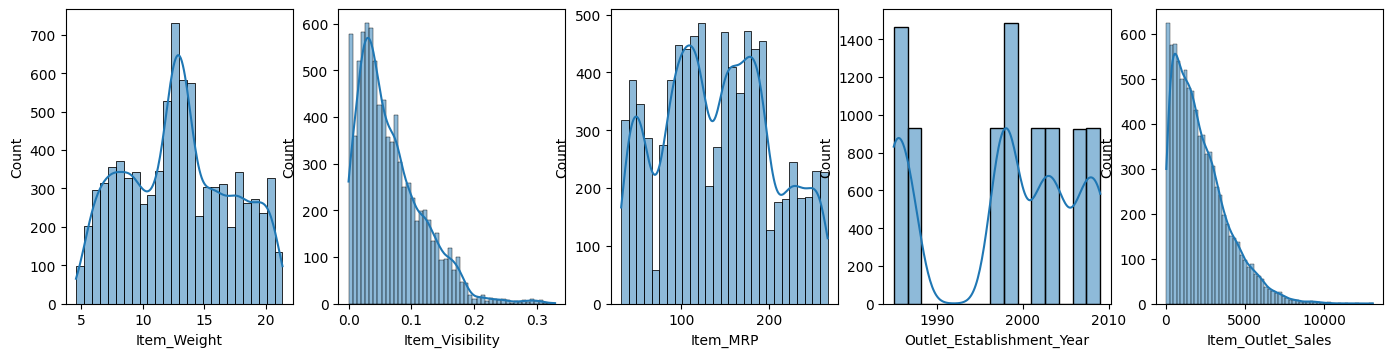

In [27]:
#We can notice that we need to scale data as item visibility is ranged from 0 to 0.3 while establishment year and sales are 1000+
numerical_features = data.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(17,13))
for i in list(enumerate(numerical_features)):
    plt.subplot(3, 5, i[0]+1)
    sns.histplot(data = data[i[1]], kde=True)  # Histogram with KDE line


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


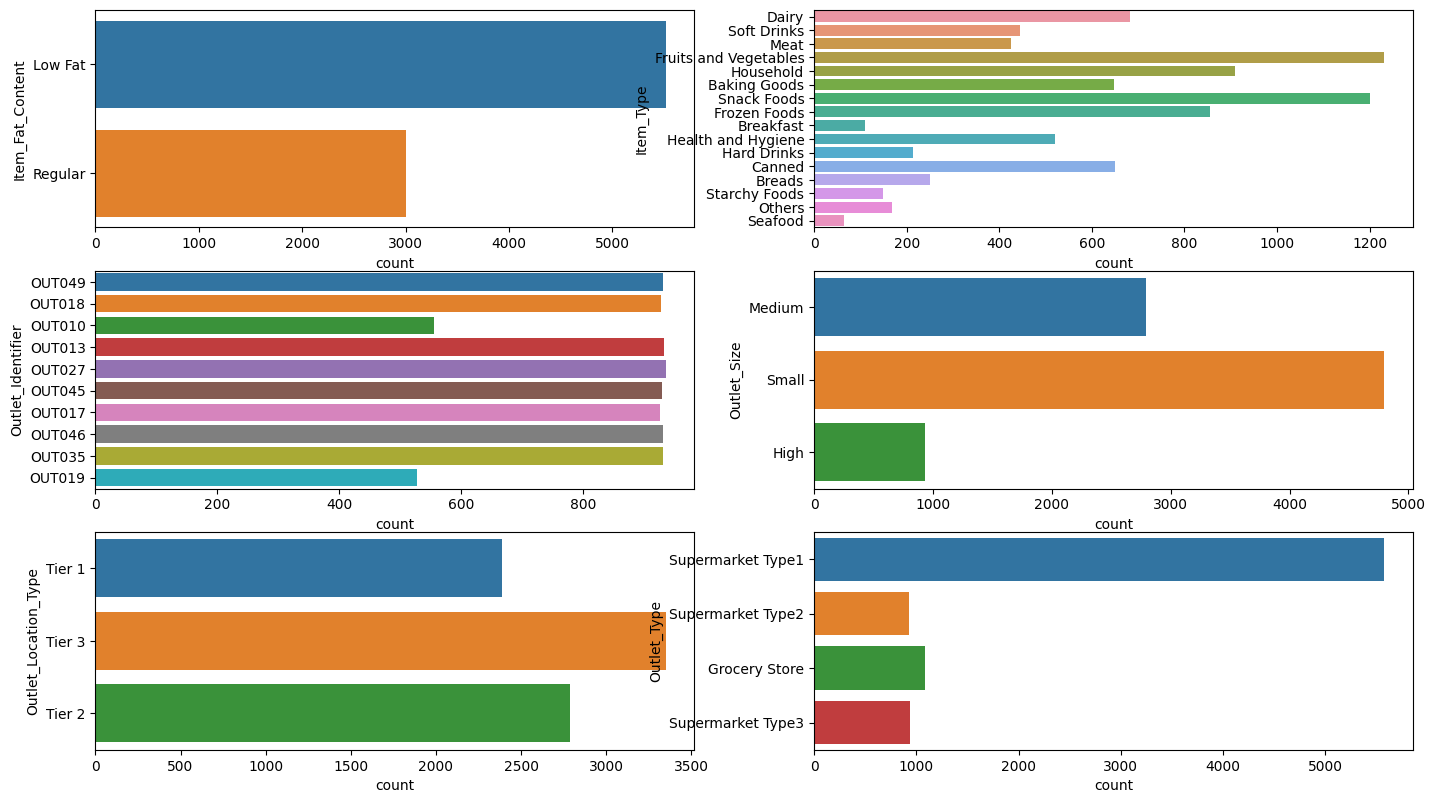

In [29]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features = categorical_features.delete(categorical_features.get_loc('Item_Identifier'))
plt.figure(figsize=(17,13))
for i in list(enumerate(categorical_features)):
    plt.subplot(4, 2, i[0]+1)
    sns.countplot(y=data[i[1]],data=data)


<function matplotlib.pyplot.show(close=None, block=None)>

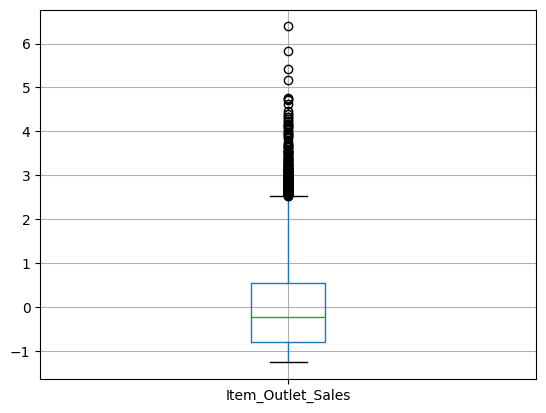

In [30]:
#@title Studying Outliers
data.boxplot(column='Item_Outlet_Sales')
plt.show

<ipython-input-31-cb2340adea86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

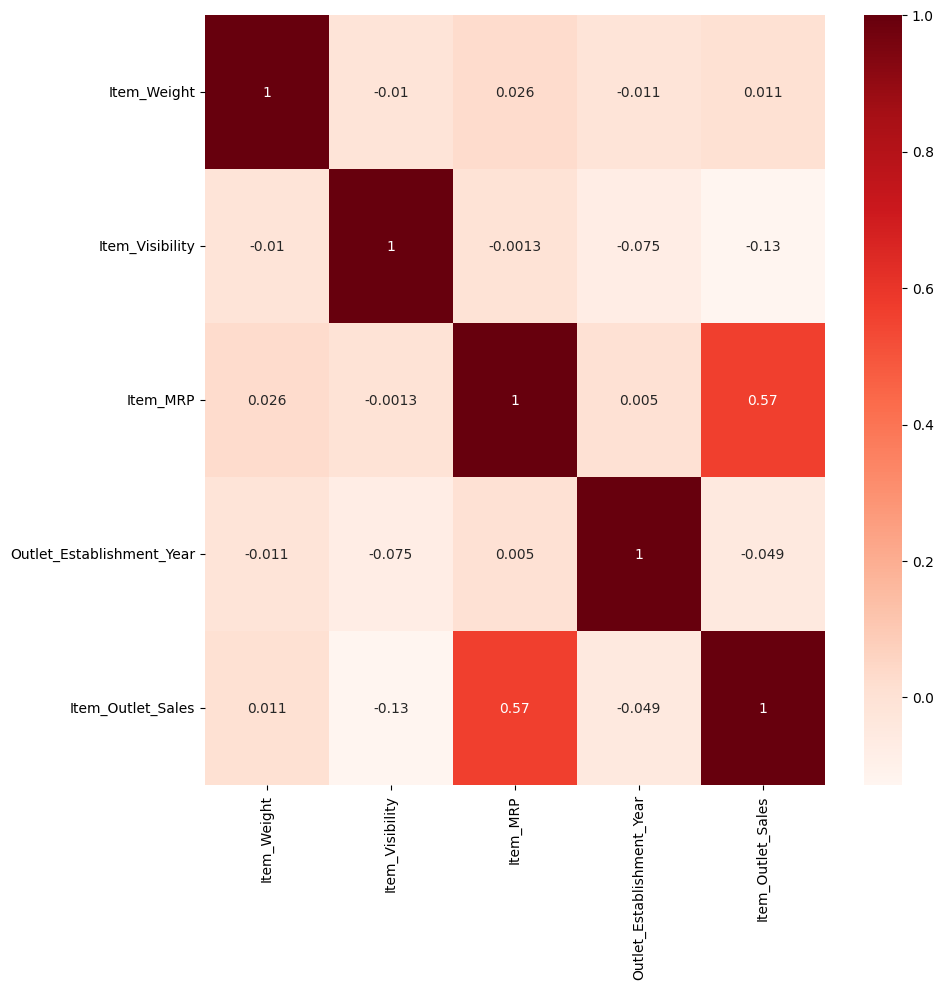

In [31]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


# Modeling

In [32]:
!pip install category_encoders


In [33]:
#@title Ordinal Encoding for Item_Fat_Content and Outlet_Size
data_cleaned = data.copy()

#Ordinal Encdoing
from category_encoders import OrdinalEncoder
ordinal1 = OrdinalEncoder(mapping=[{'col': 'Item_Fat_Content', 'mapping': {'Low Fat': 0, 'Regular': 1}}])
ordinal2=OrdinalEncoder(mapping=[{'col':'Outlet_Size','mapping':{'Small':0,'Medium':1,'High':2}}])
data_cleaned=ordinal1.fit_transform(data_cleaned)
data_cleaned=ordinal2.fit_transform(data_cleaned)




In [34]:
#@title Label Encoding for Rest of Categorical features
from sklearn import preprocessing
categorical_cols=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type']

label_encoder = preprocessing.LabelEncoder()

for i in categorical_cols:
  data_cleaned[i]= label_encoder.fit_transform(data_cleaned[i])

# #One Hot Encoding
# from sklearn.preprocessing import OneHotEncoder


# onehotencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

# transformed_data = onehotencoder.fit_transform(data_cleaned[categorical_cols])
# # # the above transformed_data is an array so convert it to dataframe
# encoded_data = pd.DataFrame(transformed_data, index=data.index)
# # # now concatenate the original data and the encoded data using pandas
# concatenated_data = pd.concat([data_cleaned, encoded_data], axis=1)


In [41]:
#@title Split Data
from sklearn.model_selection import train_test_split

x = data_cleaned.drop(['Item_Outlet_Sales'], axis=1)
y = data_cleaned['Item_Outlet_Sales']

x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=52)


In [44]:
#@title MultiLinear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model1 = linear_model.LinearRegression()
model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)



mean_squared_error 0.4872874959159812
Root_mean_squared_error 0.6980598082657253
r_score 0.49710443767778867
mean_absolute_error 0.5268552227337363


In [51]:
#@title Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_poly = poly_reg.fit_transform(x_train)

model2 = linear_model.LinearRegression()
model2.fit(x_poly,y_train)


y_pred = model2.predict(poly_reg.fit_transform(x_test))

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)



mean_squared_error 0.40091469242097766
Root_mean_squared_error 0.6331782469581355
r_score 0.5862438060117034
mean_absolute_error 0.454800008516587


In [53]:
#@title Random Forrest
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)


y_pred = regressor.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)


mean_squared_error 0.43753839352376717
Root_mean_squared_error 0.6614668499053956
r_score 0.5484470291299435
mean_absolute_error 0.4595740483925561


In [56]:
!pip install xgboost

In [61]:
#@title XGBOOST
from xgboost import XGBRegressor
xgb = XGBRegressor()
# fit model
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)

mean_squared_error 0.4832991219515044
Root_mean_squared_error 0.6951971820652788
r_score 0.50122056128947
mean_absolute_error 0.48446819026962684


# PyCaret

In [77]:
pip install --pre pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.5 MB/s eta 0:00:00
  Using cached pyod-1.1.0.tar.gz (153 kB)
  Preparing metadata (setup.py) ... done
  Using cached importlib_metadata-6.7.0-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.7 MB/s eta 0:00:00
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 8.3 MB/s et

In [78]:
from pycaret.regression import *


In [79]:
session_1 =setup(x_train, target = y_train, session_id=1, log_experiment=False)


,Description,Value
0,Session id,1
1,Target,Item_Outlet_Sales
2,Target type,Regression
3,Original data shape,"(6818, 12)"
4,Transformed data shape,"(6818, 12)"
5,Transformed train set shape,"(4772, 12)"
6,Transformed test set shape,"(2046, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [80]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4580,0.4294,0.6541,0.5802,0.2881,5.4260,0.6620
lightgbm,Light Gradient Boosting Machine,0.4690,0.4555,0.6739,0.5545,0.2994,5.9283,0.2660
rf,Random Forest Regressor,0.4819,0.4733,0.6868,0.5372,0.3012,5.7186,2.4260
et,Extra Trees Regressor,0.4872,0.4843,0.6952,0.5251,0.3054,5.6326,1.4770
xgboost,Extreme Gradient Boosting,0.5072,0.5221,0.7216,0.4891,0.3169,5.8487,0.8660
ridge,Ridge Regression,0.5419,0.5225,0.7220,0.4888,0.3229,5.4975,0.0550
br,Bayesian Ridge,0.5418,0.5225,0.7220,0.4888,0.3229,5.5026,0.0390
lr,Linear Regression,0.5419,0.5225,0.7220,0.4888,0.3228,5.4969,0.8010
lar,Least Angle Regression,0.5453,0.5254,0.7240,0.4857,0.3231,5.5710,0.0400
huber,Huber Regressor,0.5413,0.5347,0.7302,0.4772,0.3314,5.5637,0.1380


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [85]:
gbr  = create_model('gbr')
lightgbm=create_model('lightgbm')
rf=create_model('rf')

gbr = tune_model(gbr,fold=5)
lightgbm = tune_model(lightgbm,fold=5)
rf = tune_model(rf,fold=5)


blender = blend_models(estimator_list = [gbr, lightgbm, rf])



,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4193,0.3478,0.5898,0.6108,0.2592,1.6183
1,0.4774,0.4925,0.7018,0.5583,0.2999,5.3832
2,0.4521,0.4158,0.6448,0.5878,0.2950,2.0962
3,0.4480,0.4182,0.6467,0.5945,0.2797,2.0221
4,0.4582,0.4454,0.6674,0.5396,0.2894,1.4682
5,0.4712,0.4703,0.6857,0.5402,0.2991,13.9188
6,0.4628,0.4371,0.6611,0.6315,0.2794,18.1614
7,0.4472,0.3803,0.6166,0.5729,0.2894,5.7610
8,0.4897,0.5164,0.7186,0.5784,0.3073,1.9461


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4448,0.3862,0.6214,0.5679,0.2853,1.9920
1,0.4789,0.4889,0.6992,0.5616,0.3064,5.1956
2,0.4569,0.4397,0.6631,0.5642,0.2999,1.9618
3,0.4648,0.4644,0.6814,0.5497,0.2983,2.1600
4,0.4698,0.4601,0.6783,0.5245,0.2940,1.5955
5,0.4883,0.5022,0.7087,0.5090,0.3078,16.3776
6,0.4788,0.4728,0.6876,0.6014,0.2993,20.3326
7,0.4529,0.4044,0.6359,0.5458,0.2965,5.4969
8,0.4990,0.5511,0.7424,0.5501,0.3148,2.1048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4501,0.3932,0.6270,0.5600,0.2863,1.8297
1,0.5024,0.5337,0.7306,0.5214,0.3123,5.3478
2,0.4725,0.4588,0.6773,0.5453,0.3054,2.2254
3,0.4748,0.4787,0.6919,0.5358,0.2993,2.4739
4,0.4793,0.4855,0.6968,0.4982,0.2940,1.6093
5,0.5103,0.5179,0.7196,0.4937,0.3107,11.1831
6,0.4800,0.4776,0.6911,0.5973,0.2930,19.9302
7,0.4667,0.4192,0.6475,0.5291,0.2969,7.8921
8,0.5148,0.5707,0.7555,0.5340,0.3220,2.4178


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4530,0.4234,0.6507,0.5785,0.2846,3.3296
1,0.4541,0.4286,0.6547,0.5802,0.2916,2.1119
2,0.4685,0.4600,0.6783,0.5378,0.2928,7.8244
3,0.4551,0.3997,0.6322,0.6151,0.2837,10.4215
4,0.4784,0.4483,0.6695,0.5787,0.2989,1.9913
Mean,0.4618,0.4320,0.6571,0.5780,0.2903,5.1357
Std,0.0100,0.0209,0.0159,0.0245,0.0056,3.3900


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4487,0.4125,0.6423,0.5893,0.2829,3.4828
1,0.4523,0.4179,0.6465,0.5906,0.2896,2.1969
2,0.4651,0.4579,0.6767,0.5399,0.2940,8.1287
3,0.4536,0.4030,0.6348,0.6119,0.2838,12.2723
4,0.4707,0.4424,0.6652,0.5842,0.2957,1.9505
Mean,0.4581,0.4268,0.6531,0.5832,0.2892,5.6062
Std,0.0084,0.0203,0.0155,0.0236,0.0052,4.0074


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4501,0.4194,0.6476,0.5825,0.2762,4.0156
1,0.4653,0.4306,0.6562,0.5782,0.2888,2.0279
2,0.4705,0.4641,0.6812,0.5337,0.2862,7.5324
3,0.4641,0.4103,0.6406,0.6049,0.2769,12.1561
4,0.4837,0.4589,0.6775,0.5687,0.2969,1.9466
Mean,0.4667,0.4367,0.6606,0.5736,0.2850,5.5357
Std,0.0108,0.0213,0.0161,0.0232,0.0077,3.8811


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4180,0.3456,0.5879,0.6133,0.2580,1.8341
1,0.4696,0.4774,0.6909,0.5719,0.2939,5.1424
2,0.4484,0.4094,0.6399,0.5942,0.2888,2.0180
3,0.4494,0.4153,0.6444,0.5973,0.2780,2.0616
4,0.4539,0.4382,0.6620,0.5471,0.2828,1.4486
5,0.4667,0.4673,0.6836,0.5431,0.2937,13.7388
6,0.4651,0.4387,0.6623,0.6302,0.2783,17.3277
7,0.4447,0.3723,0.6101,0.5819,0.2812,7.2580
8,0.4853,0.5134,0.7165,0.5809,0.3020,1.9278


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [88]:
model = finalize_model(blender)
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.4022,0.3142,0.5606,0.6744,0.2526,3.3655


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,prediction_label
5352,525,0.014330,1,0.421795,13,-0.318281,5,-1.532846,1,2,3,0.237543,0.497746
6788,601,0.738832,0,-0.488813,13,0.004124,1,-1.293934,2,2,1,0.706928,-0.005897
7736,1080,1.057138,1,-0.477912,5,-0.769412,8,-0.099372,0,0,1,-0.793698,-0.399915
5500,412,0.101680,0,2.112834,6,1.306931,5,-1.532846,1,2,3,4.325441,2.270664
1689,1075,-0.219141,0,-0.340852,1,-1.298724,5,-1.532846,1,2,3,-0.625141,-0.321524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5440,878,-1.509347,0,1.136289,3,1.978366,7,0.497909,0,1,1,0.740483,1.112019
5695,69,0.420527,0,2.026011,7,-1.357467,7,0.497909,0,1,1,-0.436294,-0.730533
5412,664,1.528701,0,-0.771435,6,0.453733,2,1.095190,0,1,1,0.893433,0.386185
7543,156,-0.840906,0,-0.969458,4,1.731395,2,1.095190,0,1,1,2.223941,1.335178


In [92]:
save_model(model,'Voting Regressor"BigMart"')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Item_Identifier', 'Item_Weight',
                                              'Item_Fat_Content',
                                              'Item_Visibility', 'Item_Type',
                                              'Item_MRP', 'Outlet_Identifier',
                                              'Outlet_Establishment_Year',
                                              'Outlet_Size',
                                              'Outlet_Location_Type',
                                              'Outlet_Type'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',...
                                                             feature_fraction=0.6,
                                                             min_child_samples=100,
                                                            

#Summary studying R2 Score
*Voting Regressor" Gradient Boosting Regressor,Light Gradient Boosting
Machine,and Random Forrest" Gives 67%

*Polynomial Regression gives 58%


*Random Forrest Gives 54%


*XGBOOST gives 50%

*Multi Linear Regression gives 49%